<a href="https://colab.research.google.com/github/shivangipokhriyal/Bad-passwords-and-the-NIST-guidelines/blob/master/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
!pip install kaggle

In [ ]:
os.chdir('/content/drive/MyDrive/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/drive/MyDrive/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
for i in range(1,99):
    y.append('N')


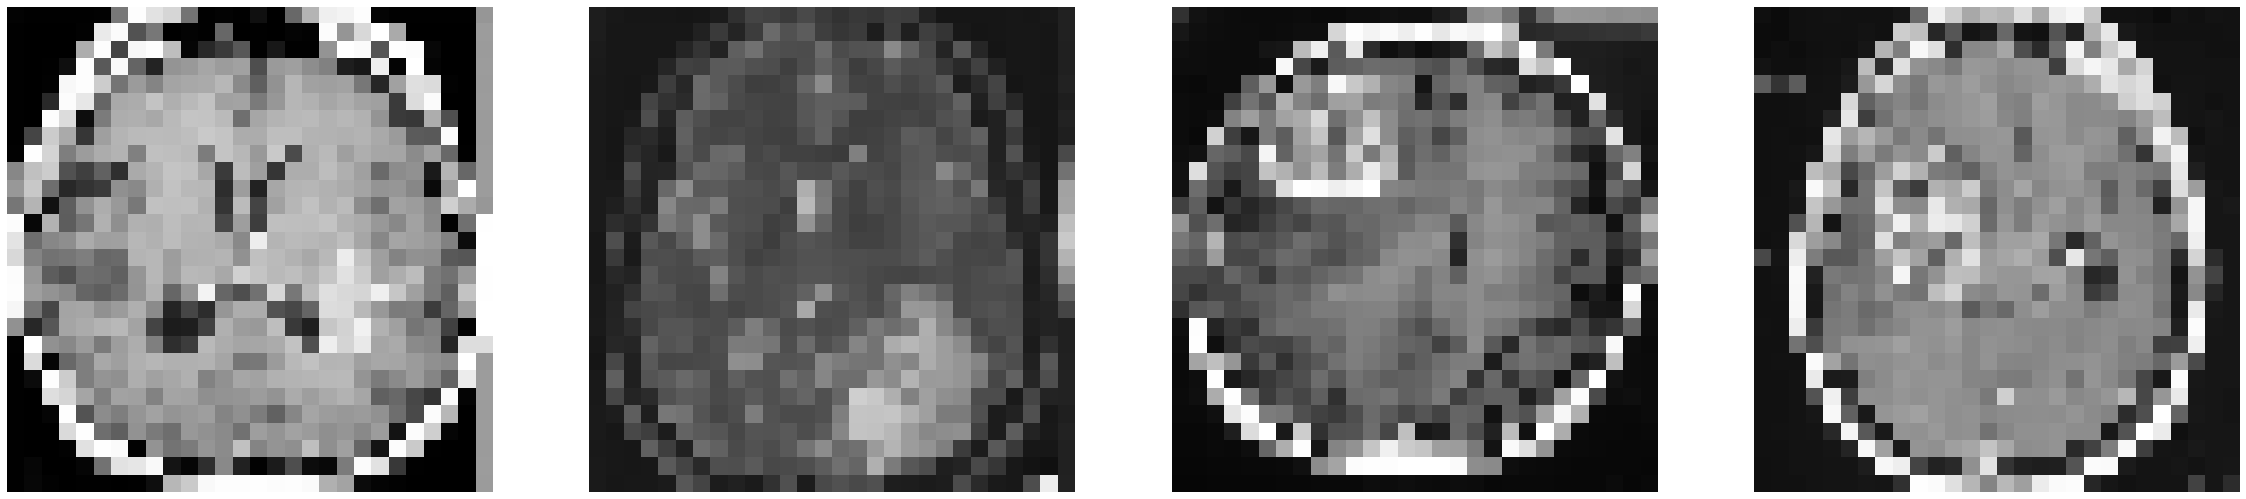

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
for i in range(4):
    plt.subplot(1,4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
len(y_train)
y_tr= np.array(y_train)
type(y_tr)
y_trr=y_tr.reshape(169,1)
print(y_trr.shape)
y_train=y_trr
y_te=np.array(y_test)
y_te.shape
y_test=y_te.reshape(84,1)

Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)
(169, 1)


In [ ]:
## USING KERAS TO SPLIT TEST AND TRAIN DATA
## converting the labels (yes or no) into categoricals using keras
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [ ]:
##defining the cnn and adding layers
m1=Sequential()
m1.add(BatchNormalization(input_shape = (28,28,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (28, 28, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
## compiling the network
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
## model training
history = m1.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 46s 176ms/step - loss: 0.6777 - accuracy: 0.5699 - val_loss: 2.4380 - val_accuracy: 0.6071
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6528 - accuracy: 0.6048 - val_loss: 2.7321 - val_accuracy: 0.6071
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6308 - accuracy: 0.6156 - val_loss: 0.8071 - val_accuracy: 0.6071
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6256 - accuracy: 0.6288 - val_loss: 1.6886 - val_accuracy: 0.6071
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5829 - accuracy: 0.7170 - val_loss: 1.2700 - val_accuracy: 0.6071
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.5707 - accuracy: 0.7118 - val_loss: 1.5358 - val_accuracy: 0.6071
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5914 - accuracy: 0.6947 - val_loss: 2.1567 - val_accuracy: 0.6071
Epoch 8/50
6/6 [=============

3/3 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.8690


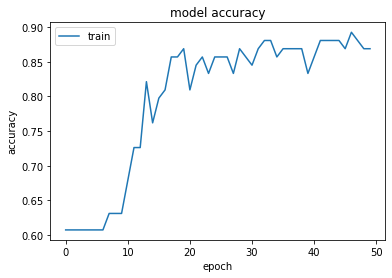

In [ ]:
## evaluation
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

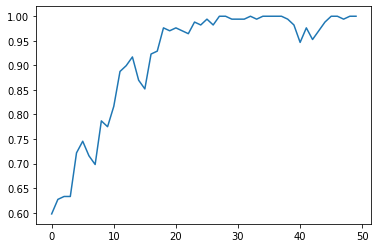

In [ ]:
## visualization
plt.plot(history.history['accuracy'])

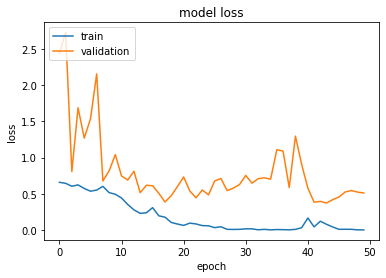

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


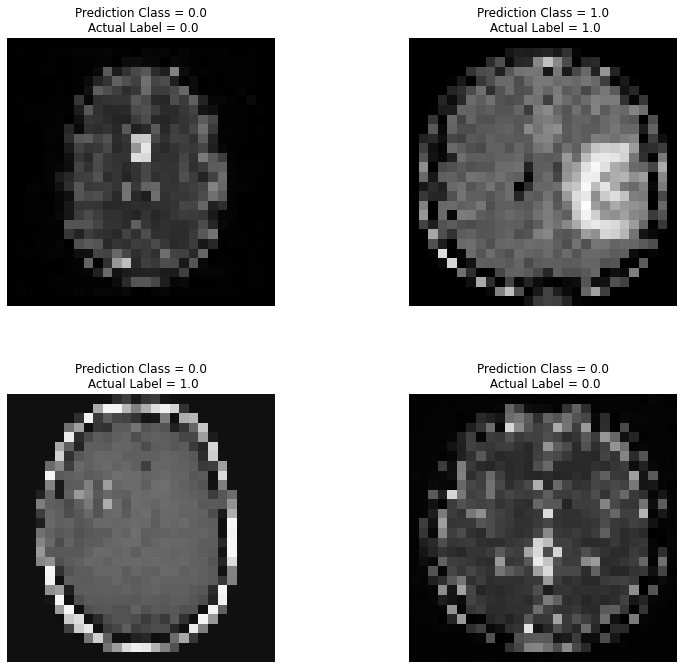

In [ ]:
##computing predictions
y_predicted=m1.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
## report of the model
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.87      0.92      0.90        51

    accuracy                           0.87        84
   macro avg       0.87      0.85      0.86        84
weighted avg       0.87      0.87      0.87        84



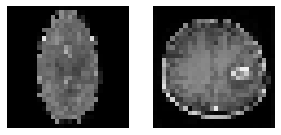

(28, 28, 3)

In [ ]:

os.chdir('/content/drive/MyDrive/Trial')
X1 = []

for i in tqdm(os.listdir()):
      imgn = cv2.imread(i) 
      if type(imgn) is np.ndarray:
            if imgn.size == 0:
                continue
      if imgn is None:
            continue
      imgn = cv2.resize(imgn,(28,28))
      X1.append(imgn)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(1, 4, i+1)
    plt.imshow(X1[i], cmap="gray")
    plt.axis('off')
plt.show()
X1[0].shape

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


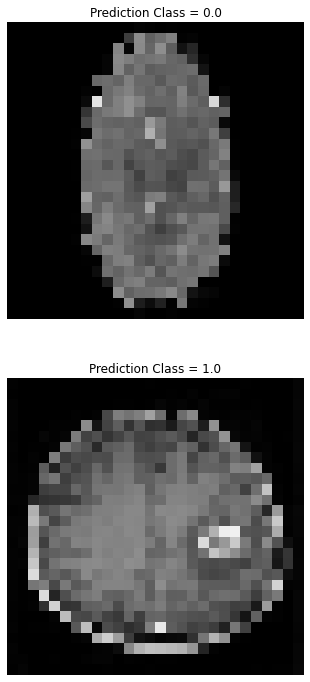

In [ ]:
##prediction made by algorithm
le = preprocessing.LabelEncoder()
X1 = np.array(X1)


y_pred=m1.predict_classes(X1)
fig, axes = plt.subplots(2, 1, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, 2):  
    axes[i].imshow(X1[i])
    axes[i].set_title(f"Prediction Class = {y_pred[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)